In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [4]:
X=np.array([2.1,1.6,1.4,1.3,1.25,1.2,1.01,0.8])
Y=np.array([10, 20, 30, 40, 50,  60, 100, 200])

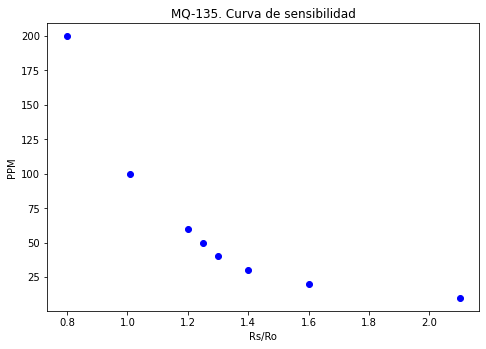

In [5]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X, Y, color='b')
ax.set_xlabel('Rs/Ro')
ax.set_ylabel('PPM')
ax.set_title('MQ-135. Curva de sensibilidad')
plt.show()

In [6]:
SX = sum(X) #Sumatoria de X
logX = np.log10(X)
logY = np.log10(Y)
SlogX = sum(logX) #Sumatoria de logX
SlogY = sum(logY) #Sumatoria de logY
SlXlY = sum(np.multiply(logX,logY)) #Sumatoria de logX*logY
SlogX2 = sum(pow(logX, 2)) #logX elevado al cuadrado

In [7]:
print("x:",logX)
print("y:",logY)
print("No. elementos:",len(X))
print("Sumatoria de X:",SX)
print("Sumatoria de logX:",SlogX)
print("Sumatoria de logY:",SlogY)
print("Sumatoria de logX*logY:",SlXlY)
print("Sumatoria de logX^2:",SlogX2)

x: [ 0.32221929  0.20411998  0.14612804  0.11394335  0.09691001  0.07918125
  0.00432137 -0.09691001]
y: [1.         1.30103    1.47712125 1.60205999 1.69897    1.77815125
 2.         2.30103   ]
No. elementos: 8
Sumatoria de X: 10.66
Sumatoria de logX: 0.8699132852051863
Sumatoria de logY: 13.15836249209525
Sumatoria de logX*logY: 1.0772717659435984
Sumatoria de logX^2: 0.20489817680384684


In [8]:
#Resolver sistema de ecuaciones
A = np.matrix([[len(X), SlogX],[SlogX, SlogX2]])  # escalares que multiplican las incognitas
b = np.matrix([[SlogY],[SlXlY]])       # igualdades
x = (A**-1)*b                    # matriz identidad

In [20]:
logA = float(x[0])
beta = float(x[1])
print("beta:",beta)
alfa = pow(10, logA) # Antilogaritmo base 10
print("alfa:",alfa)

beta: -3.2052854646008395
alfa: 98.47712534522162


In [15]:
y_p = alfa*(pow(X,beta))  #ecuacion

y = 98.47712534522162x^-3.2052854646008395

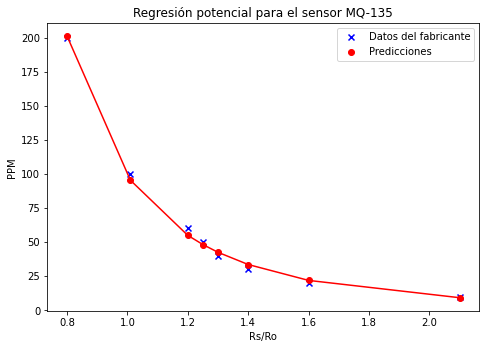

In [18]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X, Y, color='b', marker='x', label='Datos del fabricante')
ax.scatter(X, y_p, color='r',label='Predicciones')
ax.set_xlabel('Rs/Ro')
ax.set_ylabel('PPM')
ax.set_title('Regresión potencial para el sensor MQ-135')
ax.plot(X,y_p,color = 'r')
plt.legend()
plt.show()

In [19]:
r2_score(Y,y_p)

0.9971799524569178